In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
import seaborn as sns

url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
# num_columns = df.columns[df.isnull().any()].tolist()
# for col_index, col_label in enumerate(num_columns):
#     df.dropna(subset=[col_label], inplace=True)

In [5]:
duplicate_row_count = df[df.duplicated()]
duplicate_row_count

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
category_column = df.select_dtypes(include=['object']).columns
category_column

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')

In [7]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns
num_column

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
label_encoder = LabelEncoder()

In [48]:
for index, col in enumerate(df.columns):
    if is_numeric_dtype(df[col]):
        means = df[col].mean()
        df[col] = df[col].fillna(means)
    else:
        df[col] = label_encoder.fit_transform(df[col])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.836364,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495
1,3,121.836364,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
2,1,121.836364,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
3,2,164.000000,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
4,2,164.000000,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450


In [12]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [49]:
corr_number_column = df.select_dtypes(include=['int64', 'float64']).corr()
corr_number_column

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.689180e-01,-0.138394,0.193230,-0.069050,0.634824,-0.600069,-0.061339,2.120947e-01,-0.541598,...,-0.112429,0.084678,-0.073984,0.046728,-0.180012,-0.165509,0.272662,-0.028289,0.042025,-0.090242
normalized-losses,0.468918,1.000000e+00,-0.258121,0.100064,-0.015752,0.363721,-0.252949,0.309873,-2.119925e-16,-0.063653,...,0.109808,0.225149,-0.010898,0.097495,-0.113848,-0.182260,0.218053,-0.219377,-0.177044,0.127440
make,-0.138394,-2.581208e-01,1.000000,-0.106493,0.084672,-0.183553,0.093195,-0.026242,5.220893e-02,0.084673,...,-0.081998,0.149758,0.220881,-0.250754,0.130768,0.092328,-0.196698,0.058683,0.052987,-0.154161
fuel-type,0.193230,1.000638e-01,-0.106493,1.000000,-0.400081,0.125488,-0.146811,-0.128596,4.070178e-02,-0.302191,...,-0.070179,0.044157,-0.024718,-0.277117,-0.985168,-0.088480,0.492950,-0.266577,-0.199666,-0.107964
aspiration,-0.069050,-1.575222e-02,0.084672,-0.400081,1.000000,-0.036796,0.075893,0.105748,-5.814240e-02,0.269937,...,0.112352,0.287673,0.211033,0.184858,0.302328,-0.240092,-0.181231,-0.196780,-0.247491,0.189366
num-of-doors,0.634824,3.637215e-01,-0.183553,0.125488,-0.036796,1.000000,-0.642376,0.081945,1.317887e-01,-0.445680,...,-0.040116,0.009267,-0.085603,0.058793,-0.112946,-0.160321,0.200334,0.059293,0.077230,-0.062527
body-style,-0.600069,-2.529492e-01,0.093195,-0.146811,0.075893,-0.642376,1.000000,-0.157685,-2.784747e-01,0.407756,...,-0.062894,-0.052779,-0.005585,-0.032606,0.134181,0.131606,-0.089335,0.012063,-0.023116,-0.070042
drive-wheels,-0.061339,3.098727e-01,-0.026242,-0.128596,0.105748,0.081945,-0.157685,1.000000,1.480850e-01,0.472777,...,0.526009,0.438720,0.500721,0.116136,0.118686,-0.295327,-0.076598,-0.472226,-0.475363,0.591249
engine-location,0.212095,-2.119925e-16,0.052209,0.040702,-0.058142,0.131789,-0.278475,0.148085,1.000000e+00,-0.188796,...,0.199095,0.106006,0.172681,-0.159955,-0.020364,0.000133,0.181586,-0.156179,-0.102274,0.329178
wheel-base,-0.541598,-6.365282e-02,0.084673,-0.302191,0.269937,-0.445680,0.407756,0.472777,-1.887955e-01,1.000000,...,0.570654,0.385107,0.461734,0.155291,0.247128,-0.102595,-0.353856,-0.474246,-0.545504,0.588382


In [14]:
# nums = df.select_dtypes(include=['int64', 'float64']).dropna()
# X = add_constant(nums)
# # print(X.shape[1])
# for i in range(X.shape[1]):
#     col_name = X.columns[i]
#     # print(col_name)
#     # print(X.values)
# pd.DataFrame(X.values)


In [15]:
corr_number_column.to_csv('corelation.csv')

In [16]:
most_correlated_with_price = corr_number_column['price'].sort_values(ascending=False)
most_correlated_with_price

price                1.000000
engine-size          0.871051
curb-weight          0.835277
width                0.753236
length               0.692774
drive-wheels         0.591249
wheel-base           0.588382
bore                 0.529638
fuel-system          0.523984
engine-location      0.329178
aspiration           0.189366
height               0.139003
normalized-losses    0.127440
engine-type          0.125031
compression-ratio    0.069881
stroke               0.046766
num-of-cylinders     0.004485
num-of-doors        -0.062527
body-style          -0.070042
symboling           -0.090242
peak-rpm            -0.106446
fuel-type           -0.107964
make                -0.154161
horsepower          -0.338213
city-mpg            -0.688254
highway-mpg         -0.705924
Name: price, dtype: float64

In [50]:

# xHC = df[['engine-size', 
#           'curb-weight', 
#           'width', 
#           'length', 
#           'wheel-base']]

# nums = df.select_dtypes(include=['int64', 'float64']).dropna()
# X = add_constant(nums)
# # print(X.shape[1])
# for i in range(X.shape[1]):
#     col_name = X.columns[i]
#     # print(col_name)
#     # print(X.values)
# pd.DataFrame(X.values)

high_corr_vals = []
predictor = 'price'
df['price'].corr(df['make'])

for col in df.columns:
    if is_numeric_dtype(df[col]):
            if col != predictor:
                high_corr_val = df[predictor].corr(df[col])
                if high_corr_val >= 0.5 and high_corr_val <= 1:
                    high_corr_vals.append(col)
print(high_corr_vals)


['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'fuel-system', 'bore']


In [84]:
# for col in df.columns:
#     if is_numeric_dtype(df[col]):
#             if col != predictor:
#                 high_corr_val = df[predictor].corr(df[col])
#                 if high_corr_val >= 0.6 and high_corr_val <= 1:
#                     high_corr_vals.append(col)
# print(high_corr_vals)

nums = df.select_dtypes(include=['int64', 'float64']).dropna()
X = add_constant(nums)
print(nums.shape[1])
# for i in range(nums.shape[1]):
#     vif = variance_inflation_factor()

X.values
# # print(X.shape[1])
# for i in range(X.shape[1]):
#     col_name = X.columns[i]
#     # print(col_name)
#     # print(X.values)
# pd.DataFrame(X.values)

# list_vif = []
# # nums = df.select_dtypes(include=['int64', 'float64']).dropna()
# for i in range(len(nums)):
#     vif = variance_inflation_factor(nums.values, i)
#     list_vif.append(vif)
#     # print(nums[i])
# print(list_vif)
# nums.values

26


array([[ 1.00000000e+00,  3.00000000e+00,  1.21836364e+02, ...,
         2.10000000e+01,  2.70000000e+01,  1.34950000e+04],
       [ 1.00000000e+00,  3.00000000e+00,  1.21836364e+02, ...,
         2.10000000e+01,  2.70000000e+01,  1.65000000e+04],
       [ 1.00000000e+00,  1.00000000e+00,  1.21836364e+02, ...,
         1.90000000e+01,  2.60000000e+01,  1.65000000e+04],
       ...,
       [ 1.00000000e+00, -1.00000000e+00,  9.50000000e+01, ...,
         2.60000000e+01,  2.70000000e+01,  2.24700000e+04],
       [ 1.00000000e+00, -1.00000000e+00,  9.50000000e+01, ...,
         1.90000000e+01,  2.50000000e+01,  2.26250000e+04],
       [ 1.00000000e+00, -1.00000000e+00,  9.50000000e+01, ...,
         1.90000000e+01,  2.50000000e+01,  2.26250000e+04]])

<Axes: >

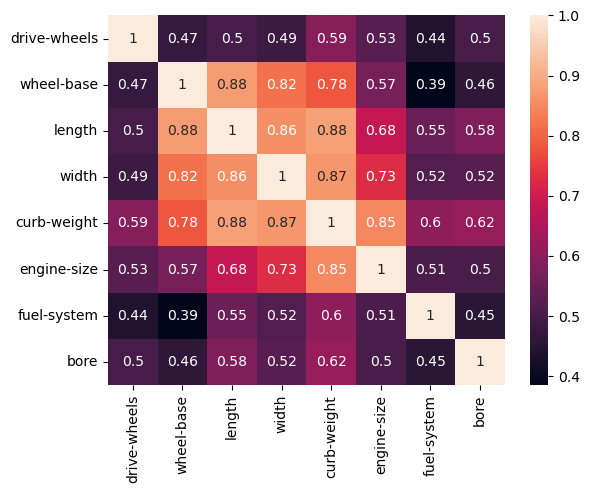

In [19]:
sns.heatmap(df[high_corr_vals].corr(), annot=True)

In [20]:
xHC = df[high_corr_vals]
yHC = df.price

In [21]:
xHC.shape

(202, 8)

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(
    xHC, yHC, test_size=0.30, random_state=2
)

In [23]:
# standard_scale = StandardScaler()
# xTrain = standard_scale.fit_transform(xTrain)
# xTest = standard_scale.fit_transform(xTest)

In [24]:
xTrain.shape

(141, 8)

In [25]:
linear_reg_model = LinearRegression()

In [26]:
training_for_lr = linear_reg_model.fit(xTrain, yTrain)
training_for_lr

LinearRegression()

In [27]:
test_for_lr = linear_reg_model.fit(xTest, yTest)
test_for_lr

LinearRegression()

In [28]:
score_training_lr = linear_reg_model.score(xTrain, yTrain)
score_training_lr

0.7544286086315017

In [29]:
score_test_lr = linear_reg_model.score(xTest, yTest)
score_test_lr

0.8621907466546619

In [30]:
lasso_model = Lasso()

In [31]:
training_for_lasso = lasso_model.fit(xTrain, yTrain)
training_for_lasso

Lasso()

In [32]:
testing_for_lasso = lasso_model.fit(xTest, yTest)
testing_for_lasso

Lasso()

In [33]:
score_training_lasso = lasso_model.score(xTrain, yTrain)
score_training_lasso

0.7545549636631745

In [34]:
score_testing_lasso = lasso_model.score(xTest, yTest)
score_testing_lasso

0.8621905706763469

In [35]:
ridge_model = Ridge()

In [36]:
training_for_ridge = ridge_model.fit(xTrain, yTrain)
training_for_ridge

Ridge()

In [37]:
testing_for_ridge = ridge_model.fit(xTest, yTest)
testing_for_ridge

Ridge()

In [38]:
score_training_ridge = ridge_model.score(xTrain, yTrain)
score_training_ridge

0.7594671729188956

In [39]:
score_testing_ridge = ridge_model.score(xTest, yTest)
score_testing_ridge

0.8618720662197337

In [40]:
df.to_csv('test_dataset_clean_v_2.csv')

In [41]:
# normalize = MinMaxScaler(feature_range=(0, 1))
# xTrain_norm = normalize.fit_transform(xTrain)
# pd.DataFrame(xTrain_norm)

In [42]:
# df.at[1, 'make'] bb

In [43]:
# df['make'].loc[df.index[1]]

In [44]:
# mean_normalized_losses = df['normalized-losses'].mean()
# df['normalized-losses'] = df['normalized-losses'].fillna(mean_normalized_losses)
# df.head()

In [45]:
# for i in df.columns:
#     df[i] = df[i].astype(str)
    
#     for j in range(len(df[i])):
#         val = df.at[j, i]
#         if not re.search(r"[A-Za-z0-9]", val):
#             df.at[j, i] = np.nan

# df.head()

# for i, j in enumerate(category_column):
#         val = df.at[i, j]
#         if not re.search(r"[A-Za-z0-9]", val):
#               df.at[i, j] = np.nan
#         print(j)
# df.head()

# for col in category_column:
#     df[col] = df[col].astype(str)
#     for i in range(len(df[col])):
#         val = df.at[i, col]
#         if val == 'nan' or val is None:
#             continue
#         match = re.search(r"[A-Za-z]", val)
#         if not match :
#             df.at[i, col] = "0"


# df.head()

In [46]:
# targeted_column_encode = []
# def func_label_encode(targeted_column_encode):
#     lbl_encode = LabelEncoder()
#     for i in range(len(targeted_column_encode)):
#         df[targeted_column_encode[i]] = lbl_encode.fit_transform(df[targeted_column_encode[i]])

In [47]:
# func_label_encode(['make', 
#                    'fuel-type', 
#                    'aspiration',
#                    'num-of-doors'])
# df.head()